### Nicolas Bataille
16/11/2021\
Student number : 2131029

In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import skimage.feature
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC

2021-11-29 19:07:01.104654: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-29 19:07:01.104711: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dataTrain = np.load('Datasets/trnImage.npy')
labelsTrainCoarse = np.load('Datasets/trnLabel_coarse.npy')
labelsTrainFine = np.load('Datasets/trnLabel_fine.npy')

dataTest = np.load('Datasets/tstImage.npy')
labelsTestCoarse = np.load('Datasets/tstLabel_coarse.npy')
labelsTestFine = np.load('Datasets/tstLabel_fine.npy')

### Histogram of Oriented Gradients
We perform the hog method on the whole training dataset, and put the array of feature values in a npy file to be used later. This part is power and time-consuming, and doesn't need to be executed each time, so the block is commented. With those parameters in the HOG method, we obtain for each sample a feature vector of size 324.

In [3]:
# size = len(dataTrain[0, 0, 0, :]) #size of the data samples
# array = []

# for i in range(size):
#    image = dataTrain[:, :, :, i]
#    hogValues = skimage.feature.hog(image, pixels_per_cell=[8,8], cells_per_block=[2,2])
#     print(hogValues.shape)
#    array.append(hogValues)

# array = np.array(array)
# np.save("Datasets/trnImageHogValues.npy", array)
# print(array.shape)

(50000, 324)


##### We do the same for the Testing dataset.

In [4]:
# size = len(dataTest[0, 0, 0, :]) #size of the data samples
# array = []

# for i in range(size):
#     image = dataTest[:, :, :, i]
#     hogValues = skimage.feature.hog(image, pixels_per_cell=[8,8], cells_per_block=[2,2])
# #     print(hogValues.shape)
#     array.append(hogValues)

# array = np.array(array)
# np.save("Datasets/tstImageHogValues.npy", array)

In [3]:
dataTrainHog = np.load('Datasets/trnImageHogValues.npy')
dataTestHog = np.load('Datasets/tstImageHogValues.npy')

In [6]:
svd = TruncatedSVD(n_components = 323)
svd.fit(dataTestHog)

TruncatedSVD(n_components=323)

In [7]:
# we get the cumulative sum of the % total variation that each PC has
sumRatio = np.cumsum(svd.explained_variance_ratio_)
# and we find where the cumulative sum gets to 95%
goal = np.where(np.cumsum(svd.explained_variance_ratio_) >= 0.95)[0][0]
print("The minimum number of PC needed to have 95% of the total variance is", goal)

The minimum number of PC needed to have 95% of the total variance is 116


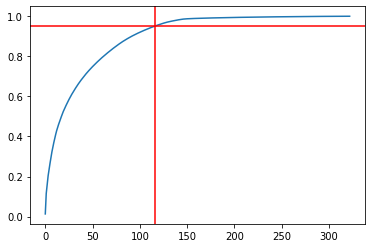

In [8]:
plt.figure()
plt.plot(sumRatio)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x = goal, color='r', linestyle='-')
plt.show()

In [35]:
lda = LinearDiscriminantAnalysis(n_components = 19)
lda = lda.fit(dataTrainHog, labelsTrainCoarse)
dataTransformedTrain = lda.transform(dataTrainHog)
dataTransformedTest = lda.transform(dataTestHog)

In [36]:
logisticRegression = LogisticRegression(verbose=True)
logisticRegression.fit(dataTransformedTrain, labelsTrainCoarse)

score = logisticRegression.score(dataTransformedTest, labelsTestCoarse)
print(score)
score = lda.score(dataTestHog, labelsTestCoarse)
print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.2974
0.2894


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished


In [37]:
# lda = LinearDiscriminantAnalysis(n_components = 19)
# lda = lda.fit(dataTrainHog, labelsTrainFine)
# dataTransformedTrain = lda.transform(dataTrainHog)
# dataTransformedTest = lda.transform(dataTestHog)

In [38]:
# logisticRegression = LogisticRegression(verbose=True)
# logisticRegression.fit(dataTransformedTrain, labelsTrainFine)

# score = logisticRegression.score(dataTransformedTest, labelsTestFine)
# print(score)
# score = lda.score(dataTestHog, labelsTestFine)
# print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.1963
0.2044


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.0s finished


#### Testing SVM


In [4]:
# standardScaler = StandardScaler()

# standardScaler.fit(dataTrainHog)

# dataTrainHog = standardScaler.transform(dataTrainHog)
# dataTestHog = standardScaler.transform(dataTestHog)

In [9]:
# SVM = SVC(verbose = True, max_iter = 50)
# SVMFit = SVM.fit(dataTrainHog, labelsTrainCoarse)

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -83.349857, rho = -0.036773
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -83.907701, rho = -0.158413
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -80.594611, rho = -0.143544
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -83.843634, rho = -0.134948
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -81.477013, rho = -0.149806
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -81.548888, rho = -0.157162
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -83.716262, rho = -0.111530
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -84.781176, rho = -0.19362

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -81.967686, rho = -0.183443
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -81.458127, rho = -0.147090
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -80.785908, rho = -0.189760
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -80.957538, rho = -0.121447
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -81.191589, rho = -0.197213
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -81.462099, rho = -0.164352
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -80.546368, rho = -0.183671
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -85.260826, rho = -0.137879
nSV = 

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -85.372811, rho = -0.136037
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -85.488995, rho = -0.224816
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -86.013890, rho = -0.260481
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -84.153295, rho = -0.141301
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -84.373047, rho = -0.002486
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -81.626593, rho = -0.186582
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -82.805058, rho = -0.090686
nSV = 100, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -82.539860, rho = -0.224412
nSV = 

/home/batum/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [10]:
# prediction = SVM.predict(dataTestHog)

# winePredictionAccuracy = SVM.score(dataTestHog, labelsTestCoarse)
# print(f'The model accuracy on the testing data is {winePredictionAccuracy*100:0.2f}%')

The model accuracy on the testing data is 16.94%


### Testing Neural Network

In [3]:
outputSize = len(np.unique(labelsTrainCoarse))

# note: Dense layers are fully connected layers
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(5, activation = tf.nn.relu),
#     tf.keras.layers.Dense(250, activation = tf.nn.relu),
    tf.keras.layers.Dense(outputSize, activation = tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

2021-11-22 20:25:17.050390: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-22 20:25:17.050417: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-22 20:25:17.050437: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Batum-Laptop): /proc/driver/nvidia/version does not exist
2021-11-22 20:25:17.050667: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
history = model.fit(dataTrain, 
            labelsTrainCoarse, 
            epochs = 5,
            validation_split = 0.2,
            verbose = 1)

2021-11-22 20:25:21.465222: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 480000000 exceeds 10% of free system memory.
2021-11-22 20:25:21.673948: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2021-11-22 20:25:22.191631: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 480000000 exceeds 10% of free system memory.
2021-11-22 20:25:22.191668: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 480000000 exceeds 10% of free system memory.
2021-11-22 20:25:22.191765: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 480000000 exceeds 10% of free system memory.
2021-11-22 20:25:22.191960: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 480000000 exceeds 10% of free system memory.


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [2400,20] and labels shape [25]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at tmp/ipykernel_4658/2978840618.py:1) ]] [Op:__inference_train_function_688]

Function call stack:
train_function


In [62]:
# Get the predicted labels on the Testing dataset
SVMPredict = model.predict(dataTestHog)
# Get the loss and accuracy of the model on the Testing dataset
results = model.evaluate(dataTestHog, labelsTestCoarse)
print(f'The accuracy is {results[1]*100:0.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 2.2407 - sparse_categorical_accuracy: 0.3127
The accuracy is 31.27%


In [19]:
def plotAccuracyLoss(history):
    plt.figure(figsize=[10,5])
    plt.subplot(121)
    plt.plot(history.history['sparse_categorical_accuracy'])
    plt.plot(history.history['val_sparse_categorical_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy',
               'Validation Accuracy'])
    plt.title('Accuracy Curves')

    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training Loss',
               'Validation Loss'])
    plt.title('Loss Curves')
    plt.show()

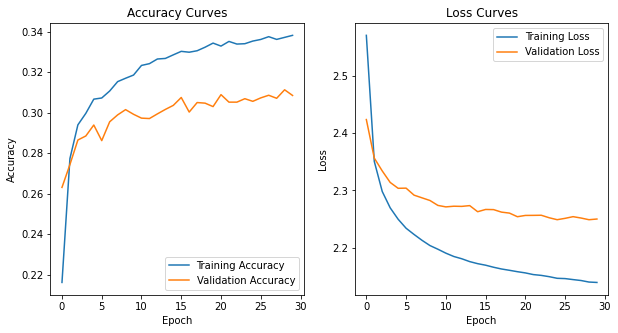

In [63]:
plotAccuracyLoss(history)